In [15]:
def read_input(filename):
    rules = []
    updates = []

    first_part = True
    with open(filename) as fp:
        for line in fp:
            line = line.strip()
            if not line:
                first_part = False
                continue
            if first_part:
                rules.append([int(x) for x in line.split("|")])
            else:
                updates.append([int(x) for x in line.split(",")])
    
    return rules, updates
            

In [ ]:
import networkx as nx
from collections import defaultdict

def generate_order(rules):
    comes_before = defaultdict(set)

    for first,second in rules:
        comes_before[second].add(first)

    return comes_before
    

In [31]:
rules, updates = read_input("sample.txt")
comes_before = generate_order(rules)
comes_before

defaultdict(set,
            {53: {47, 61, 75, 97},
             13: {29, 47, 53, 61, 75, 97},
             61: {47, 75, 97},
             47: {75, 97},
             29: {47, 53, 61, 75, 97},
             75: {97}})

In [55]:
def check_update_nx(update, order):
    rule_index = 0
    for ix, pno in enumerate(update):
        r_index = order.index(pno)
        if r_index < rule_index:
            return False
        else:
            rule_index = r_index
    
    return True

def check_update(update, comes_before):
    #print("=================")
    #print(f"Checking {update}")
    for ix, val in enumerate(update):
        #print(f"Previous Vals {update[0:ix]}")
        for prev_val in update[0:ix]:
            #print(f"Checking {prev_val} comes before {val}")
            if prev_val not in comes_before[val]:
                return False
    return True

def bubble_sort(update, comes_before):
    for i in range(len(update)):
        for j in range(i, len(update)):
            first, second = update[i], update[j]
            # Check for bad order
            if first in comes_before and second in comes_before[first]:
                temp = update[i]
                update[i] = update[j]
                update[j] = temp

    return update

def part1(filename):
    rules, updates = read_input(filename)
    order = generate_order(rules)
    valid_updates = [update for update in updates if check_update(update, order)]

    s = 0
    for update in valid_updates:
        s += update[len(update) // 2]

    return s

def part2(filename):
    rules, updates = read_input(filename)
    order = generate_order(rules)
    invalid_updates = [update for update in updates if not check_update(update, order)]

    #print(invalid_updates)

    for invalid_update in invalid_updates:
        bubble_sort(invalid_update, order)

    s = 0
    for update in invalid_updates:
        s += update[len(update) // 2]

    return s

    #print(invalid_updates)


In [46]:
part1("sample.txt"), part1("full.txt")

(143, 5108)

In [57]:
part2("sample.txt"), part2("full.txt")

(123, 7380)

In [47]:
rules, updates = read_input("sample.txt")
generate_order(rules)

defaultdict(set,
            {53: {47, 61, 75, 97},
             13: {29, 47, 53, 61, 75, 97},
             61: {47, 75, 97},
             47: {75, 97},
             29: {47, 53, 61, 75, 97},
             75: {97}})

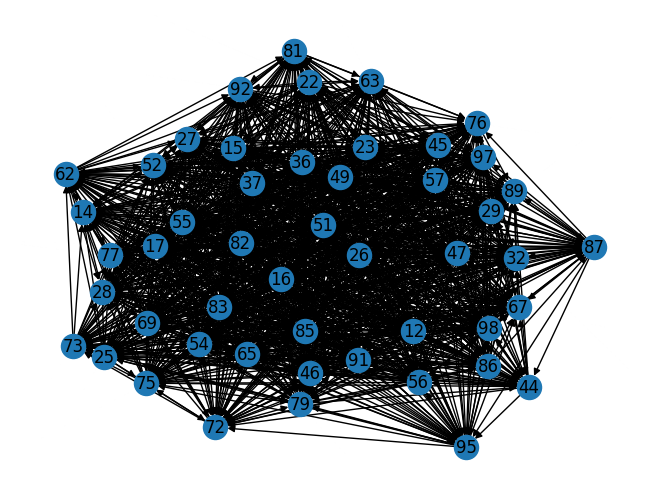

In [28]:
rules, updates = read_input("full.txt")
g = nx.DiGraph()
g.add_edges_from(rules)
nx.draw(g, with_labels=True)
